<a href="https://www.kaggle.com/code/mikedelong/eda-with-map?scriptVersionId=137045991" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/los-angeles-crime-dataset-2020-present/Crime_Data_from_2020_to_Present.csv', 
                 parse_dates=['Date Rptd', 'DATE OCC']).drop(columns=['DR_NO'])
df.sample(n=7)

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
567801,2022-06-24,2022-06-23,1000,2,Rampart,215,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2004 0421 0443 1822 1210,...,IC,Invest Cont,930.0,NaN,NaN,NaN,300 ROBINSON ST,NaN,34.0757,-118.2821
181768,2021-01-10,2020-12-24,1200,14,Pacific,1412,2,662,"BUNCO, GRAND THEFT",0701,...,IC,Invest Cont,662.0,NaN,NaN,NaN,100 BROOKS CT,NaN,33.9915,-118.4748
414004,2022-02-01,2022-02-01,930,14,Pacific,1443,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,1200 VENICE BL,NaN,33.9948,-118.4511
155174,2020-05-01,2020-05-01,1900,20,Olympic,2005,2,624,BATTERY - SIMPLE ASSAULT,1822 0340 0446 0416 0206,...,IC,Invest Cont,624.0,NaN,NaN,NaN,4600 MELROSE AV,NaN,34.0836,-118.3005
222277,2021-03-05,2021-03-05,915,14,Pacific,1446,2,860,BATTERY WITH SEXUAL CONTACT,0400 0416 0500,...,IC,Invest Cont,860.0,NaN,NaN,NaN,INGLEWOOD BL,HERBERT ST,34.0002,-118.4242
287338,2021-11-03,2021-11-03,1225,4,Hollenbeck,421,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 1300,...,IC,Invest Cont,740.0,NaN,NaN,NaN,MAIN ST,AVENUE 20,34.0660,-118.2181
300587,2021-06-19,2021-06-19,330,20,Olympic,2033,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0913 0360 0416,...,AO,Adult Other,230.0,NaN,NaN,NaN,HOBART BL,8TH,34.0577,-118.3053


In [2]:
df.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Vict Age', ylabel='Density'>

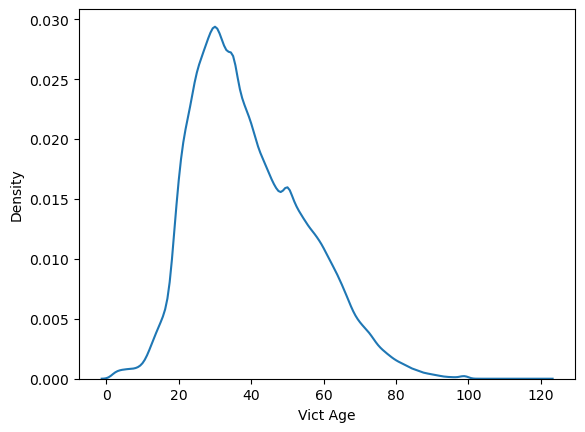

In [3]:
# let's look at some distributions
%matplotlib inline
from seaborn import kdeplot
# we need to drop ages = 0 to filter out unknowns
kdeplot(data=df[df['Vict Age'] > 0], x='Vict Age')

In [4]:
from folium import Map
from folium import Marker

sample_size = 1000
sample_df = df.sample(sample_size)

# for some reason we have to fudge the center a little
lon_fudge = -0.5
location_map = Map(location=[sample_df['LAT'].mean(), sample_df['LON'].mean() + lon_fudge], zoom_start=10)
for index, row in sample_df.iterrows():
    popup = '{}/{}/{}:{}'.format(row['LOCATION'], row['AREA NAME'], row['Crm Cd Desc'], row['Status'])
    Marker([row['LAT'], row['LON']], popup=popup).add_to(parent=location_map)

location_map

In [5]:
df.shape

(752911, 27)

In [6]:
df['Crm Cd'].nunique()

138

We have 138 codes; clearly we can't make sense of a pie with that many slices, so let's look at the top ten or so

In [7]:
crime_code_value_counts = df['Crm Cd Desc'].value_counts()
code_df = pd.DataFrame(data={'Code': crime_code_value_counts.index, 'Count': crime_code_value_counts.values}).reset_index(drop=True)
code_df.head(10)

,Code,Count
0,VEHICLE - STOLEN,80439
1,BATTERY - SIMPLE ASSAULT,59630
2,THEFT OF IDENTITY,48645
3,BURGLARY FROM VEHICLE,46526
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",46157
5,BURGLARY,45717
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",43149
7,THEFT PLAIN - PETTY ($950 & UNDER),38510
8,INTIMATE PARTNER - SIMPLE ASSAULT,37947
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),29310


In [8]:
import plotly.express as px
code_df.loc[code_df['Count'] < 15000, 'Code'] = 'Other' # we have too many codes so let's apply a threshold
px.pie(code_df, names='Code', values='Count').show()

In [9]:
# Surely the areas are shaped so the crime is roughly the same in each one; right?
area_value_counts = df['AREA NAME'].value_counts()
area_df = pd.DataFrame(data={'Area': area_value_counts.index, 'Count': area_value_counts.values}).reset_index(drop=True)
px.pie(area_df, names='Area', values='Count').show()

In [10]:
victim_descent = df['Vict Descent'].replace(to_replace={'B': 'Black', 'H': 'Hispanic', 'W': 'White',}).value_counts()
descent_df = pd.DataFrame(data={'Descent': victim_descent.index, 'Count': victim_descent.values}).reset_index(drop=True)
descent_df.loc[descent_df['Count'] < 80000, 'Descent'] = 'Other' # threshold
px.pie(descent_df, names='Descent', values='Count').show()

<Axes: xlabel='DATE OCC'>

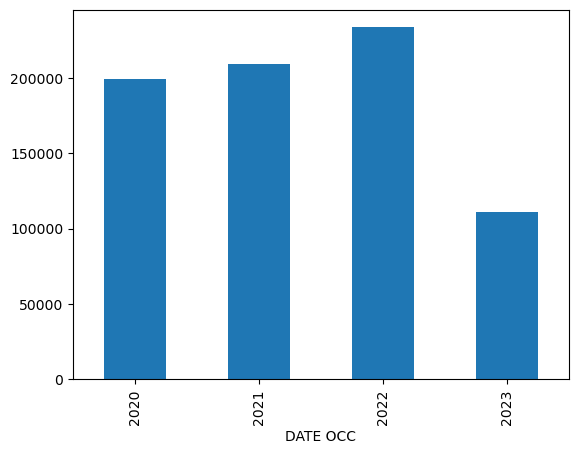

In [11]:
# not surprisingly we have an incomplete current year
df['DATE OCC'].groupby(df['DATE OCC'].dt.year).count().plot(kind='bar')

<Axes: xlabel='DATE OCC'>

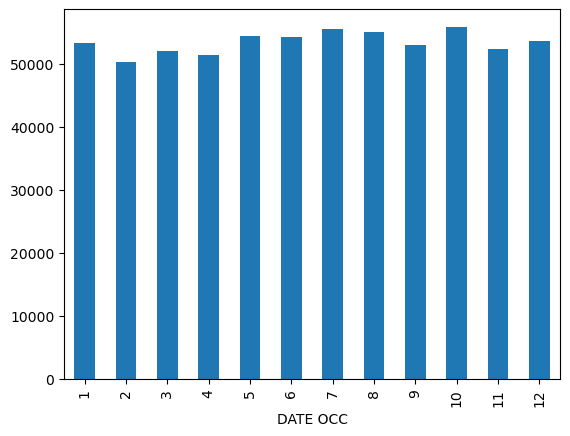

In [12]:
# where we have complete years we do not have obvious seasonality
df[df['DATE OCC'].dt.year < 2023]['DATE OCC'].groupby(df['DATE OCC'].dt.month).count().plot(kind='bar')

<Axes: xlabel='DATE OCC'>

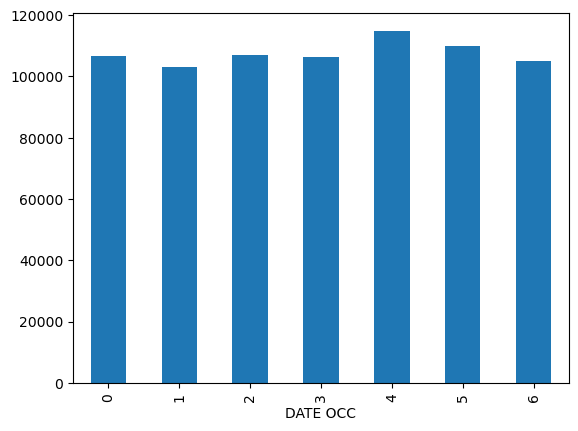

In [13]:
# nor do weekends seem to matter much
df['DATE OCC'].groupby(df['DATE OCC'].dt.dayofweek).count().plot(kind='bar')